-----

# 멕시코 음식 프랜차이즈 Chipotle의 주문 데이터 분석하기
<img src="/수업자료/1.jpg" width="800" height="500"/>

-----

# <탐색> : 데이터의 기초 정보 살펴보기

### [Chipotle 데이터셋의 기본 정보]

In [187]:
# -*- coding: utf-8 -*-

import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path = '수업자료/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [7]:
print(chipo.shape)
print(chipo.info())

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


#### order_id : 주문번호 
#### quantity : 아이템의 주문 수량
#### item_name : 주문한 아이템의 이름
#### choice_description : 주문한 아이템의 상세 선택옵션
#### item_price : 주문 아이템의 가격정보

### [Chipotle 데이터셋의 행과 열, 데이터]

In [15]:
print(chipo.columns)
print('------------------------------------')
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------
RangeIndex(start=0, stop=4622, step=1)


##### 이제 데이터의 수치적 특징 탐색을 위한 간단한 질문들을 정의합니다.

- quantity와 item_price의 요약 통계
- order_id와 item_name의 개수

In [188]:
# order_id가 int64인데 이걸 string으로 바꿔야함

chipo['order_id'] = chipo['order_id'].astype(str)
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


### [Chipotle 데이터셋의 수치적 특징 파악]

##### describe 함수로 요약 통계량 출력하기

In [6]:
chipo.describe()
# quantity만 출력됨. 가장 많이 시킨게 15개.

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


##### unique 함수로 범주형 피처의 개수 출력하기

In [14]:
# order_id와 item_name의 개수
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


- `pandas에서 유용하게 사용되는 함수 value_counts()와 unique()의 차이점 '
    - 각 함수는 어떤 데이터 타입에 적용이 되는지, 어떤 기능을 가지고 있는지, 정확히 어떤 결과값을 반환하는지 실행
    
-  고유값 자체만 필요한 경우에는 unique를, 고유값의 빈도까지 확인해야 하는 경우에는 value_counts를 사용하면 됩니다.

# <인사이트의 발견> : 탐색과 시각화

-----
##### 다음으로, 인사이트를 발견할 수 있을만한 개념적 질문들을 정의합니다.

- 가장 많이 주문한 item은 무엇인지
- item당 주문의 총량은 얼마인지

### [가장 많이 주문한 item]

In [27]:
chipo['item_name'].value_counts().idxmax()
# chipo['item_name'].value_counts().index[0]

'Chicken Bowl'

In [36]:
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val,cnt) in enumerate(item_count.items(),1):
    print("Top",idx,";",val,cnt)

Top 1 ; Chicken Bowl 726
Top 2 ; Chicken Burrito 553
Top 3 ; Chips and Guacamole 479
Top 4 ; Steak Burrito 368
Top 5 ; Canned Soft Drink 301
Top 6 ; Steak Bowl 211
Top 7 ; Chips 211
Top 8 ; Bottled Water 162
Top 9 ; Chicken Soft Tacos 115
Top 10 ; Chips and Fresh Tomato Salsa 110


-----

### [item당 주문 개수와 총량 구하기]

In [56]:
chipo.pivot_table(index='item_name', values='order_id',aggfunc='count')[:10]

,order_id
item_name,
6 Pack Soft Drink,54
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,11
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,162
Bowl,2
Burrito,6


In [55]:
chipo.groupby('item_name')[['order_id']].count()[:10] # string이라서 count임

,order_id
item_name,
6 Pack Soft Drink,54
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,11
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,162
Bowl,2
Burrito,6


In [85]:
# quantity로 해야함
item_quantity = chipo.groupby('item_name')['quantity'].sum() # int64라서 sum임
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### [시각화로 분석 결과 살펴보기]
- 지금까지의 분석 결과를 간단한 시각화로 표현

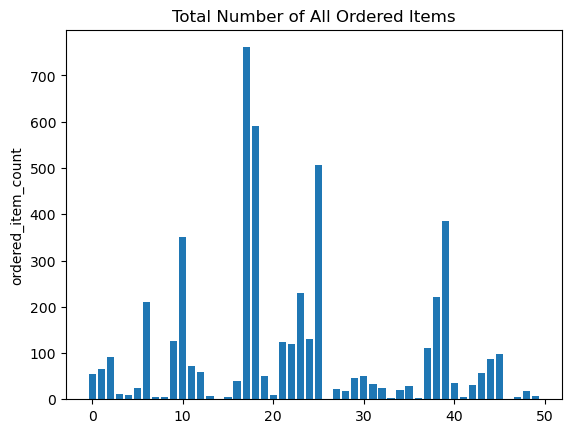

In [88]:
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index # 리스트로 만들기
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Total Number of All Ordered Items')
plt.show()

## 실습

### 1. [groupby 를 pivot_table로 수정하여 결과를 나타내시오]

In [60]:
item_quantity = chipo.pivot_table(index='item_name',values='quantity',aggfunc='sum')
item_quantity[:10]

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


-----

In [90]:
chipo['item_name'].value_counts()[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

-----

# <데이터 전처리> : 함수를 이용

### [apply와 lambda 함수를 이용한 데이터 전처리]

In [95]:
print(chipo.info())
print('------------')
chipo['item_price'].head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

-----

# <탐색적 분석> : 개념적 탐색

##### 데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기


- 주문당 평균 계산금액 출력하기
- 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
- “Veggie Salad Bowl”이 몇 번 주문되었는지 구하기
- “Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기
-----

## item price를 숫자로~

In [189]:
chipo['item_price'].str.replace('$','').astype(float)

C:\Users\LG\AppData\Local\Temp\ipykernel_18296\1234366793.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'].str.replace('$','').astype(float)


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [190]:
chipo['item_price'] =chipo['item_price'].apply(lambda x : float(x[1:]))

In [191]:
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

### [주문당 평균 계산금액 출력하기]

In [119]:
order_mean = chipo.groupby('order_id')['item_price'].sum()
# mean임 잘못함
order_mean

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [121]:
order_mean.mean()

18.811428571428568

-----

### [한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기]

In [137]:
order_mean[order_mean>=10]

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [139]:
chipo_orderid_group =chipo.groupby('order_id').sum()
result = chipo_orderid_group[chipo_orderid_group.item_price>10]
result

C:\Users\LG\AppData\Local\Temp\ipykernel_18296\2066146665.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo_orderid_group =chipo.groupby('order_id').sum()


,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


-----

### [각 아이템의 가격 구하기]

In [148]:
# 각 아이템의 가격 구하기

# 정답이 없다.. 알수없어서. 각 아이템 중에서 가장 싼걸 하면 되지 않을까요
# quantity가 1인것만 골라야함 데이터가 많아서 ㄱㅊ인듯... 

chipo_quantity_1 =chipo[chipo['quantity']==1]
menu_price = chipo_quantity_1.groupby('item_name')[['item_price']].min()
menu_price

,item_price
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,8.69
Barbacoa Burrito,8.69
Barbacoa Crispy Tacos,8.99
Barbacoa Salad Bowl,9.39
Barbacoa Soft Tacos,8.99
Bottled Water,1.09
Bowl,7.40
Burrito,7.40


In [149]:
# 각 아이템의 가격 구하기

# 정답이 없다.. 알수없어서. 각 아이템 중에서 가장 싼걸 하면 되지 않을까요

chipo_one_item = chipo[chipo.quantity == 1]
# 아이템별 가격
price_per_item = chipo_one_item.groupby('item_name').min()
# 아이템별 가격이 비싼 순으로 출력
price_per_item.sort_values(by='item_price',ascending=False)[:15]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


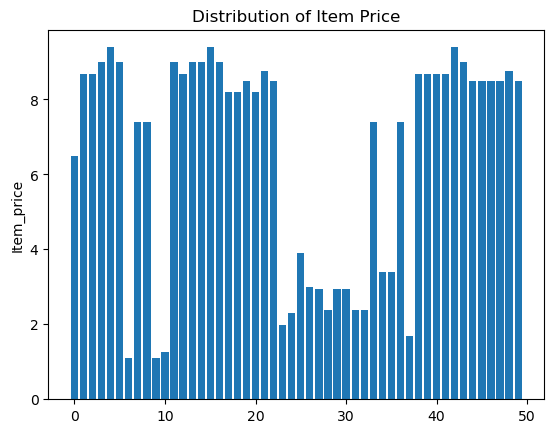

In [150]:
# 그림 그리기

item_name_list = price_per_item.index.tolist() 
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('Item_price')
plt.title('Distribution of Item Price')
plt.show()

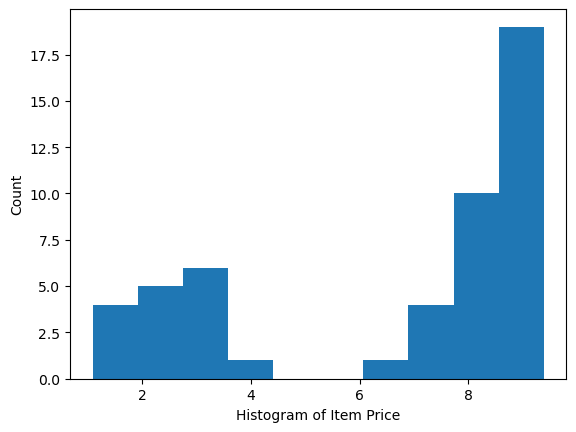

In [151]:
# 가격분포 히스토그램

plt.hist(item_price)
plt.ylabel('Count')
plt.xlabel('Histogram of Item Price')
plt.show()

# 8불이 제일 많다.

-----

## 실습

### 1. [가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기]

In [160]:
most_price = chipo.loc[chipo['item_price'].idxmax()]
most_price

order_id                                      1443
quantity                                        15
item_name             Chips and Fresh Tomato Salsa
choice_description                             NaN
item_price                                   44.25
Name: 3598, dtype: object

In [159]:
most_price['quantity']

15

order_id 총 주문 가격으로 해야함? 그러면 다르게 함

In [222]:
chipo['total_bill'] = chipo['item_price'] * chipo['quantity']
chipo

,order_id,quantity,item_name,choice_description,item_price,total_bill
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [223]:
grouped = chipo.groupby('order_id')[['total_bill','quantity']].sum()
most_price = grouped.sort_values(by='total_bill',ascending=False)
most_price

,total_bill,quantity
order_id,,
1443,1074.24,35
511,315.29,17
1559,246.00,16
1660,222.75,19
926,205.25,23
...,...,...
1001,10.08,2
1494,10.08,2
1262,10.08,2


In [224]:
most_price['quantity'][0]

35

### 2. [“Veggie Salad Bowl”이 몇 번 주문되었는지 구하기]

In [170]:
orders = chipo[chipo['item_name']=='Veggie Salad Bowl']
orders['quantity'].count() # sum()

print(f"Veggie Salad Bowl이 주문된 횟수: {orders['quantity'].count()}번")

Veggie Salad Bowl이 주문된 횟수: 18번


### 3. [“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기]

- 1) Chicken Bowl”을 2개 이상 주문한 주문 횟수
- 2) Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량

1. Chicken Bowl”을 2개 이상 주문한 주문 횟수 

In [192]:
chicken_bowl = chipo[chipo['item_name']=='Chicken Bowl']
chicken_bowl_2 = chicken_bowl[chicken_bowl['quantity']>=2]
chicken_bowl_2

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
654,271,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
976,401,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1017,418,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Black Beans]]",17.50
1106,457,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50


In [194]:
print(f"2개 이상 주문한 주문 횟수 : {chicken_bowl_2.item_name.count()} 번")

2개 이상 주문한 주문 횟수 : 33 번


2. Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량

In [195]:
chicken_bowl_2['quantity'].sum()

68